In [ ]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(".."))

from sqlalchemy import create_engine
from database.connexion import get_connection


1. Connexion à la base de données

In [ ]:

# === 1. Connexion à la base de données ===
try:
    conn = get_connection()

    user = conn.user.decode() if isinstance(conn.user, bytes) else conn.user
    password = conn.password.decode() if isinstance(conn.password, bytes) else conn.password
    host = conn.host.decode() if isinstance(conn.host, bytes) else conn.host
    db = conn.db.decode() if isinstance(conn.db, bytes) else conn.db
    port = conn.port  # en général déjà un int

    db_url = f"mysql+pymysql://{user}:{password}@{host}:{port}/{db}"

    from sqlalchemy import create_engine
    engine = create_engine(db_url)

    print("✅ Connexion réussie à la base de données via SQLAlchemy !")

except Exception as e:
    print(f"❌ Erreur lors de la création du moteur SQLAlchemy : {e}")
    raise SystemExit



✅ Connexion réussie à la base de données MySQL !
✅ Connexion réussie à la base de données via SQLAlchemy !


In [32]:
# === 2. Chargement des données ===
try:
    hosts_df = pd.read_sql("SELECT * FROM hosts", engine)
    print(f"✅ Données Hosts chargées ({len(hosts_df)} lignes)")
except Exception as e:
    print(f"❌ Erreur lors du chargement des données : {e}")


✅ Données Hosts chargées (265 lignes)



🔍 Aperçu des données :
   id         game_slug       game_end_date     game_start_date  \
0   1      beijing-2022 2022-02-20 12:00:00 2022-02-04 15:00:00   
1   2        tokyo-2020 2021-08-08 14:00:00 2021-07-23 11:00:00   
2   3  pyeongchang-2018 2018-02-25 08:00:00 2018-02-08 23:00:00   
3   4          rio-2016 2016-08-21 21:00:00 2016-08-05 12:00:00   
4   5        sochi-2014 2014-02-23 16:00:00 2014-02-07 04:00:00   

        game_location         game_name game_season  game_year  decade  
0               China      Beijing 2022      Winter       2022    2020  
1               Japan        Tokyo 2020      Summer       2020    2020  
2   Republic of Korea  PyeongChang 2018      Winter       2018    2010  
3              Brazil          Rio 2016      Summer       2016    2010  
4  Russian Federation        Sochi 2014      Winter       2014    2010  

ℹ️ Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 9 columns):
 #

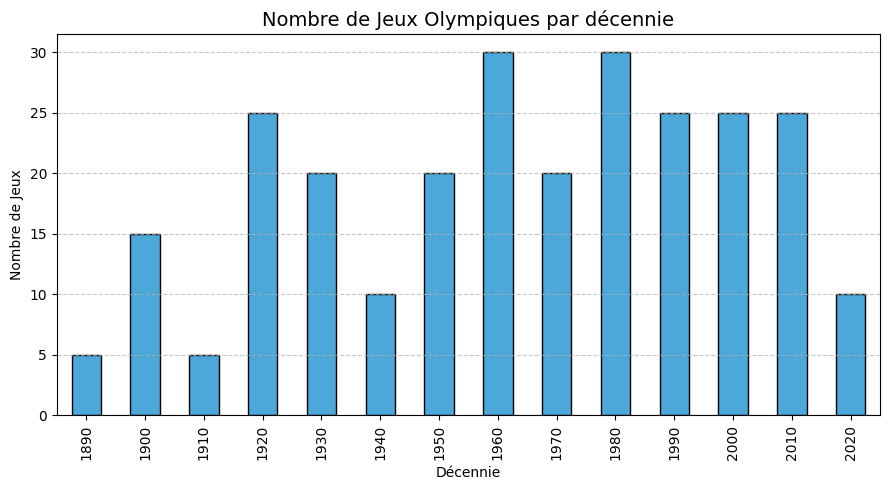

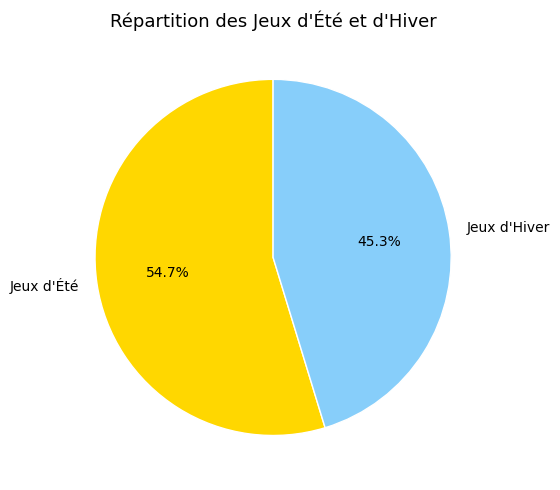


✅ Analyses et visualisations terminées avec succès !


In [34]:

# === 3. Exploration des données ===
print("\n🔍 Aperçu des données :")
print(hosts_df.head())

print("\nℹ️ Informations générales :")
print(hosts_df.info())

# === 4. Vérification des valeurs manquantes ===
missing = hosts_df.isnull().sum()
print("\n🚨 Valeurs manquantes par colonne :")
print(missing[missing > 0])

# === 5. Analyse descriptive ===
print("\n📊 Nombre de JO par saison :")
print(hosts_df["game_season"].value_counts())

print("\n📆 Années des premiers et derniers JO :")
print(f"De {hosts_df['game_year'].min()} à {hosts_df['game_year'].max()}")

# Nettoyage basique
hosts_df = hosts_df.dropna(subset=["game_year", "game_season"])
hosts_df["game_year"] = hosts_df["game_year"].astype(int)

# === 6. Visualisation 1 — Jeux par décennie ===
hosts_df["decade"] = (hosts_df["game_year"] // 10) * 10
decade_counts = hosts_df["decade"].value_counts().sort_index()

plt.figure(figsize=(9, 5))
decade_counts.plot(kind="bar", color="#4DA8DA", edgecolor="black")
plt.title("Nombre de Jeux Olympiques par décennie", fontsize=14)
plt.xlabel("Décennie")
plt.ylabel("Nombre de Jeux")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# === 7. Visualisation 2 — Été vs Hiver ===
season_counts = hosts_df["game_season"].value_counts()

plt.figure(figsize=(6, 5))
plt.pie(
    season_counts,
    labels=["Jeux d'Été", "Jeux d'Hiver"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#FFD700", "#87CEFA"],
    wedgeprops={"edgecolor": "white"}
)
plt.title("Répartition des Jeux d'Été et d'Hiver", fontsize=13)
plt.tight_layout()
plt.show()

print("\n✅ Analyses et visualisations terminées avec succès !")

